## Assignment

Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. Using your own Jupyter notebook, reproduce the `pop1` and `pop2` populations and samples using numpy's binomial function. Specifically, create two binomially distributed populations with `n` equal to `10` and size equal to `10000`. The p-value of `pop1` should be `0.2` and the p-value of `pop2` should be `0.5`. Using a sample size of `100`, calculate the means and standard deviations of your samples.

For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen.  Discuss the results with your mentor.

 1. Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each.  Repeat this again, decreasing the size of your samples to 20.  What values change, and what remain the same?

 2. Change the probability value (`p` in the [NumPy documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html)) for `pop1` to 0.3, then take new samples and compute the t-statistic and p-value.  Then change the probability value p for group 1 to 0.4, and do it again.  What changes, and why?
 
 3. Change the distribution of your populations from binomial to a distribution of your choice.  Do the sample mean values still accurately represent the population values?

When you've given it a try, you can find a sample solution [here](https://github.com/Thinkful-Ed/data-201-resources/blob/master/solutions/Prep%20course/3.3.7.ipynb).


In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

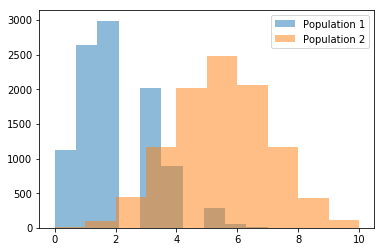

In [2]:
# Create the two populations as stated and graph them
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)  

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

Since these aren't normal, we want to take a sample and calculate their means and standard deviations.

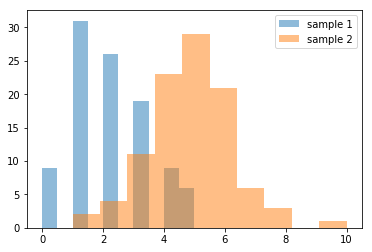

Sample 1's mean is: 2.06
Sample 2's mean is: 4.82
Sample 1's std is: 1.325292420562345
Sample 1's std is: 1.5124814048443704


In [3]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

print("Sample 1's mean is: {}".format(sample1.mean()))
print("Sample 2's mean is: {}".format(sample2.mean()))
print("Sample 1's std is: {}".format(sample1.std()))
print("Sample 1's std is: {}".format(sample2.std()))

1. By increasing the size of my samples from 100 to 1000, and recalculating the means and standard deviations, I expect that the standard deviations will change while the means stay relatively the same. On the reverse side by decreasing the size of samples down to 20, I expect that both the standard deviation and mean will change because the sample size is considerably smaller in this case and can vary widely within the original case.

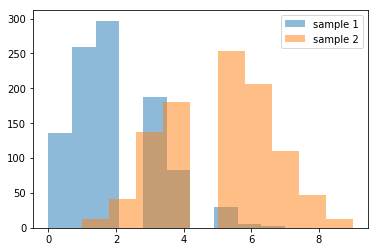

Sample 1's mean is: 1.943
Sample 2's mean is: 4.986
Sample 1's std is: 1.311392771064413
Sample 1's std is: 1.5999387488275918


In [4]:
sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

print("Sample 1's mean is: {}".format(sample1.mean()))
print("Sample 2's mean is: {}".format(sample2.mean()))
print("Sample 1's std is: {}".format(sample1.std()))
print("Sample 1's std is: {}".format(sample2.std()))

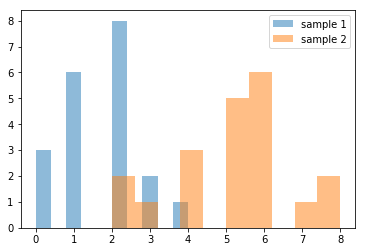

Sample 1's mean is: 1.6
Sample 2's mean is: 5.15
Sample 1's std is: 1.019803902718557
Sample 1's std is: 1.6209565077447328


In [5]:
sample1 = np.random.choice(pop1, 20, replace=True)
sample2 = np.random.choice(pop2, 20, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

print("Sample 1's mean is: {}".format(sample1.mean()))
print("Sample 2's mean is: {}".format(sample2.mean()))
print("Sample 1's std is: {}".format(sample1.std()))
print("Sample 1's std is: {}".format(sample2.std()))

2. By changing the probability value for pop1 to 0.3, I expect that the t-statistic will be lower and the p-value will be higher. By increasing the probability value for pop1 to 0.4 again, I expect the t-statistic to go even lower and the p-value to go even higher. I assume the above because we are changing the probability value from pop1 to be closer and closer to pop2, which would make pop1 act more and more like pop2 on average.

In [7]:
from scipy.stats import ttest_ind

# create new versions of pop1 to be tested
pop1_3 = np.random.binomial(10, 0.3, 10000)
pop1_4 = np.random.binomial(10, 0.4, 10000)

# take samples from pop1, pop2, and edited pop1 variables
sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)
sample1_3 = np.random.choice(pop1_3, 1000, replace=True)
sample1_4 = np.random.choice(pop1_4, 1000, replace=True)

print(ttest_ind(sample2, sample1, equal_var=False))
print(ttest_ind(sample2, sample1_3, equal_var=False))
print(ttest_ind(sample2, sample1_4, equal_var=False))

Ttest_indResult(statistic=47.152026070470676, pvalue=9e-323)
Ttest_indResult(statistic=29.513288811282237, pvalue=4.532811400525594e-159)
Ttest_indResult(statistic=14.481107465945264, pvalue=2.9412245628960393e-45)


3. By changing the distribution of my populations from binomial to gamma, I expect that the sample mean values will still accurately represent the population values because the sample size is so large (10,000). This is what the Central Limit Theorem proves.

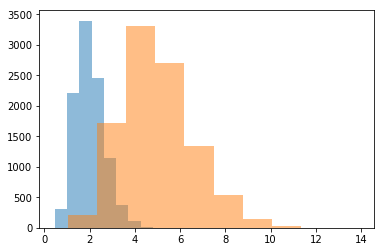

In [9]:
gamma1 = np.random.gamma(10, 0.2, 10000)
gamma2 = np.random.gamma(10, 0.5, 10000)

# Plot and print the histogram
plt.hist(gamma1, alpha=0.5, label='gamma 1')
plt.hist(gamma2, alpha=0.5, label='gamma 2')
plt.show()

In [11]:
print("Gamma 1's mean is: {}".format(gamma1.mean()))
print("Gamma 2's mean is: {}".format(gamma2.mean()))
print("Gamma 1's std is: {}".format(gamma1.std()))
print("Gamma 2's std is: {}".format(gamma2.std()))

Gamma 1's mean is: 2.009986921876424
Gamma 2's mean is: 4.986176287595438
Gamma 1's std is: 0.6417463156272409
Gamma 1's std is: 1.5589175096185373
